Implement a region counting algorithm to count the number of 
distinct regions in a segmented image. Display the original image 
with the regions labeled by their count. 

In [4]:
import cv2
import numpy as np

# Load segmented image (ensure it's single-channel grayscale)
segmented = cv2.imread('imgg.jpg', cv2.IMREAD_GRAYSCALE)

# Ensure binary image (if not already)
_, binary = cv2.threshold(segmented, 1, 255, cv2.THRESH_BINARY)

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)

# Create color output for visualization
output = cv2.cvtColor(segmented, cv2.COLOR_GRAY2BGR)

# Label each region (skip background label 0)
for i in range(1, num_labels):
    # Get region properties
    x, y = int(centroids[i][0]), int(centroids[i][1])
    area = stats[i, cv2.CC_STAT_AREA]
    
    # Draw label if region is large enough (optional size filter)
    if area > 50:  # Adjust minimum region size as needed
        cv2.putText(output, str(i), (x-10, y), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display results
print(f"Number of distinct regions: {num_labels - 1}")  # Exclude background
cv2.imshow('Original Segmented', segmented)
cv2.imshow('Labeled Regions', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of distinct regions: 15


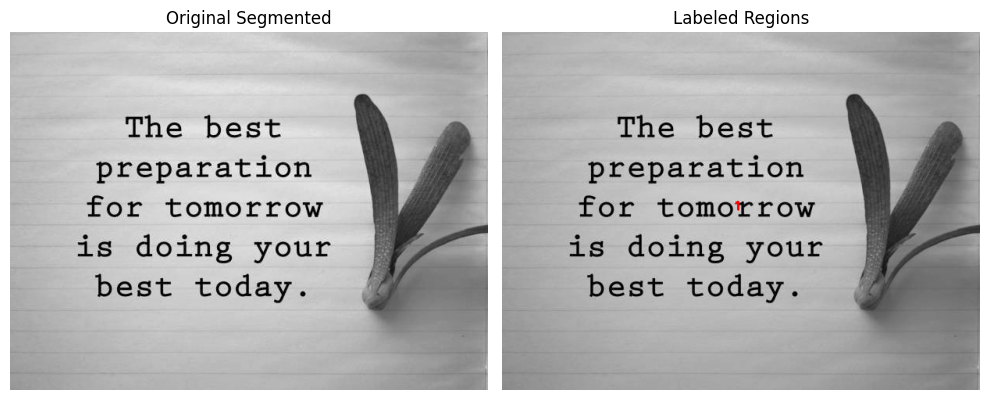

Number of distinct regions: 9


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
segmented = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Ensure binary image
_, binary = cv2.threshold(segmented, 1, 255, cv2.THRESH_BINARY)

# Connected components analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)

# Convert to BGR for visualization
output = cv2.cvtColor(segmented, cv2.COLOR_GRAY2BGR)

# Annotate regions
for i in range(1, num_labels):  # Skip background (label 0)
    x, y = map(int, centroids[i])
    area = stats[i, cv2.CC_STAT_AREA]
    if area > 50:
        cv2.putText(output, str(i), (x - 10, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(segmented, cmap='gray')
axs[0].set_title('Original Segmented')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[1].set_title('Labeled Regions')
axs[1].axis('off')

plt.tight_layout()
plt.show()

# Region count (excluding background)
print(f"Number of distinct regions: {num_labels - 1}")
